Brief illustration of some of the exercises. Not all of them are done and some are incomplete.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import bernoulli

Exercise 1.10 illustration of hoeffding bound for multiple 'samples'

In [5]:
def hoeffding(eps, n, twosided=True):
    if twosided:
        return(2*np.exp(-2*n*eps**2))
    else:
        return(np.exp(-2*n*eps**2))

def coin_flipper(n_coins, n_flips):
    flips = bernoulli.rvs(0.5, size=(n_coins, n_flips))
    #flips = np.random.randint(0, 2, size=(n_coins, n_flips)) # same shit
    return(flips)
    

Flip some coins 1000 times, take first coin, random coin, coin with minimal loss and get their averages (losses)
Repeat 1000 times to get distributions of losses for these coins.

In [6]:
c1 = []
crand = []
cmin = []
for i in range(1000):
    flips = coin_flipper(1000, 10)
    flips_mean = np.mean(flips, 1)
    v1 = flips_mean[0]
    vrand = flips_mean[int(np.random.randint(0, flips_mean.shape[0], 1))]
    vmin = np.min(flips_mean)
    c1.append(v1)
    crand.append(vrand)
    cmin.append(vmin)

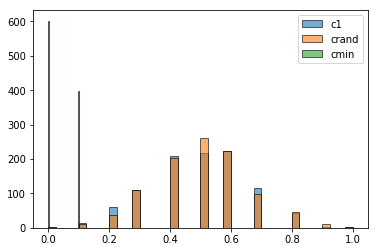

In [7]:
kwargs = dict(histtype='stepfilled', alpha=0.6, bins=40, ec="k")
plt.hist(c1, label='c1', **kwargs)
plt.hist(crand, label='crand', **kwargs)
plt.hist(cmin, label='cmin', **kwargs)
plt.legend()
plt.show()

Check which coins obey hoeffding bound

In [7]:
possible_eps = np.arange(0.1, 1.1, 0.1)

def fraction_above(some_array, some_scalar):
    return(np.sum(some_array > some_scalar)/some_array.shape[0])

def empirical_probs(frequencies, mu=0.5, eps = possible_eps):
    frequencies = np.array(frequencies)
    probs = []
    for i in possible_eps:
        prob = np.sum(np.abs(frequencies-mu)>i)/frequencies.shape[0]
        probs.append(prob)
    return(probs)

In [8]:
empirical_c1 = empirical_probs(c1)
empirical_crand = empirical_probs(crand)
empirical_cmin = empirical_probs(cmin)
hoeffdings = [hoeffding(i, 10) for i in possible_eps]

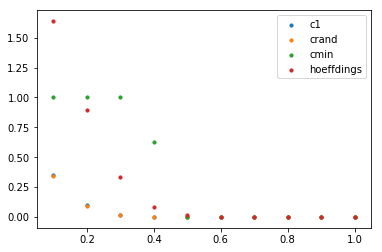

In [9]:
plt.scatter(possible_eps, empirical_c1, label='c1', s=10)
plt.scatter(possible_eps, empirical_crand, label='crand', s=10)
plt.scatter(possible_eps, empirical_cmin, label='cmin', s =10)
plt.scatter(possible_eps, hoeffdings, label='hoeffdings', s=10)
plt.legend()
plt.show()

Perceptron (part of in chapter exercise)

In [8]:
def perceptron(w, x):
    if len(w.shape) < 2:
        w = np.expand_dims(w, 1)
    a = x@w
    a[a>0] = 1
    a[a<=0] = -1
    return(a.ravel())

def perceptron_training(x, y, max_iterations = 1000, verbose=True, add_bias=True):
    if add_bias:
        x = np.c_[np.ones(x.shape[0]), x]
    w0 = np.zeros(x.shape[1])
    wbest = w0
    loss = 1
    losses = [loss]
    iterations = max_iterations
    missclassified = None
    while loss > 0 and iterations > 0:
        iterations -= 1
        output = perceptron(w0, x)
        loss = np.sum(y!=output)/y.shape[0]
        if loss < min(losses):
            wbest = w0
            if verbose:
                print('new best w found, lower loss {} obtained at iter {}'.format(loss, max_iterations-iterations))
        losses.append(loss)
        if loss == 0:
            break
        missclassified_indices = np.arange(0, y.shape[0])[y!=output]
        rdm_index = np.random.choice(missclassified_indices)
        w0 = w0+y[rdm_index]*x[rdm_index, :]
    return (wbest, losses[1:], max_iterations - iterations)

Simulate 20 random points and split them up in linearly separable classes

In [9]:
np.random.seed(777)
test_data = np.random.normal(0, 1, (20, 2))


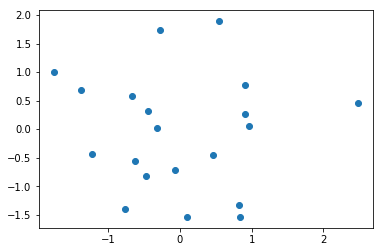

In [10]:
plt.scatter(test_data[:, 0], test_data[:, 1])
plt.show()

In [19]:
# we can visually make up some rules
bool1 = test_data[:, 0]>-0.2
bool2 = test_data[:, 1]>-0.5
combined = np.logical_not(bool1, bool2)
y = np.copy(combined)*1 # boolean to one zero
y[y>0] = 1
y[y<=0] = -1
x_true = test_data[y>0, :]
x_false = test_data[y<0, :]

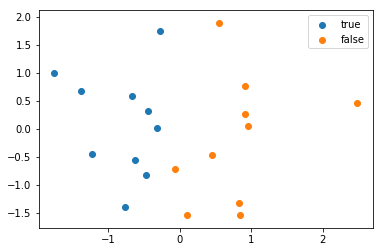

In [20]:
plt.scatter(x_true[:, 0], x_true[:, 1], label='true')
plt.scatter(x_false[:, 0], x_false[:, 1], label='false')
plt.legend()
plt.show()

In [21]:
perceptron_weights, train_loss, train_iterations = perceptron_training(test_data, y, 100)

new best w found, lower loss 0.5 obtained at iter 1
new best w found, lower loss 0.25 obtained at iter 2
new best w found, lower loss 0.05 obtained at iter 3
new best w found, lower loss 0.0 obtained at iter 11


In [22]:
perceptron_weights

array([ 0.        , -5.13903974,  1.44246532])

In [23]:
def twod_function(x, w = perceptron_weights):
    '''predict x2 from x1 using perceptron weights, two dimensions'''
    y = -x*w[1]/w[2] - w[0]/w[2]
    return(y)

In [24]:
x_1 = np.linspace(-1.5, 2, 20)
#x_2 = np.linspace(-1.5, 2, 20)
#plot_data = np.vstack((x_1, x_2)).T

In [25]:
y_line = np.apply_along_axis(twod_function, 0, x_1)

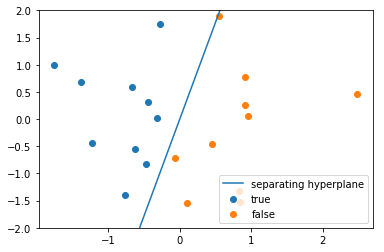

In [26]:
plt.scatter(x_true[:, 0], x_true[:, 1], label='true')
plt.scatter(x_false[:, 0], x_false[:, 1], label='false')
plt.plot(x_1, y_line, label='separating hyperplane')
plt.legend(loc='lower right')
plt.ylim(-2, 2)
plt.show()

Problem 1.4

e) Same as earlier but 1000 points instead of 20

In [169]:
data_e = np.random.normal(0, 1, (1000, 2))

In [170]:
def target_e(x1):
    return(2*x1 -1)
def above_target_e(x):
    y = np.sign(-x[:, 1] + x[:, 0]*2 -1)
    return(y)
    
pts_e_x = np.linspace(-2, 3, 100)
pts_e_y = target_e(pts_e_x)
y_e = above_target_e(data_e)
data_e_1 = data_e[y_e>0, :]
data_e_0 = data_e[y_e<1, :]

In [171]:
w_e, t_l_e, t_i_e = perceptron_training(data_e, y_e, 1000)

new best w found, lower loss 0.316 obtained at iter 1
new best w found, lower loss 0.18 obtained at iter 3
new best w found, lower loss 0.167 obtained at iter 6
new best w found, lower loss 0.135 obtained at iter 8
new best w found, lower loss 0.11 obtained at iter 9
new best w found, lower loss 0.068 obtained at iter 12
new best w found, lower loss 0.051 obtained at iter 15
new best w found, lower loss 0.034 obtained at iter 19
new best w found, lower loss 0.031 obtained at iter 34
new best w found, lower loss 0.028 obtained at iter 36
new best w found, lower loss 0.015 obtained at iter 38
new best w found, lower loss 0.008 obtained at iter 40
new best w found, lower loss 0.007 obtained at iter 50
new best w found, lower loss 0.002 obtained at iter 77
new best w found, lower loss 0.001 obtained at iter 228
new best w found, lower loss 0.0 obtained at iter 301


Made up some target function via. gauss elimination on some random points

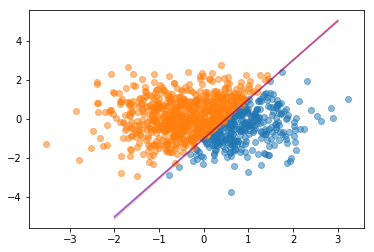

In [158]:
target_approx = twod_function(x=pts_e_x, w=w_e)

plt.scatter(data_e_1[:, 0], data_e_1[:, 1], alpha=0.5)
plt.scatter(data_e_0[:, 0], data_e_0[:, 1], alpha=0.5)
plt.plot(pts_e_x, pts_e_y, c='blue', alpha=0.5)
plt.plot(pts_e_x, target_approx, c='red', alpha=0.5)
plt.show()

f) instead of R10 we use R3 tho, we'll use SKLearn to make blobs because I really can't be arsed.

In [172]:
from sklearn.datasets import make_blobs
np.random.seed(23)
x_f, y_f = make_blobs(n_samples=100, n_features=3, centers=2, cluster_std=1)
y_f[y_f<1] = -1

In [211]:
n_1 = np.sum(y_f>0)
n_0 = np.sum(y_f<0)

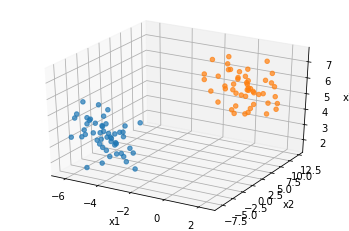

In [146]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_f[y_f>0, 0], x_f[y_f>0, 1], x_f[y_f>0, 2], alpha=0.7)
ax.scatter3D(x_f[y_f<1, 0], x_f[y_f<1, 1], x_f[y_f<1, 2], alpha=0.7)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

Make up some points below for a to go through. Plane solutions copy pasta'd from here 
http://kitchingroup.cheme.cmu.edu/blog/2015/01/18/Equation-of-a-plane-through-three-points/ 
https://stackoverflow.com/questions/48335279/given-general-3d-plane-equation-how-can-i-plot-this-in-python-matplotlib
and other stackexhange answers, no idea how to do high school geometry anymore wtf

In [196]:
p1 = np.array([-8, 12.5, 10])
p2 = np.array([-5, 12.5, 0])
p3 = np.array([1, -5, -0])

def make_plane(p1, p2, p3):
    v1 = p3 - p1
    v2 = p2 - p1
    cp = np.cross(v1, v2)
    a, b, c = cp
    d = np.dot(cp, p3)
    x = np.linspace(-6, 2, 5)
    y = np.linspace(-7.5, 12.5, 5)
    X, Y = np.meshgrid(x, y)

    Z = (d - a * X - b * Y) / c
    return(X,Y,Z)

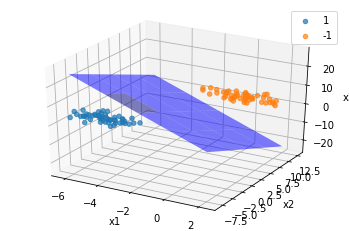

In [219]:
X1, X2, X3 = make_plane(p1, p2, p3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_f[y_f>0, 0], x_f[y_f>0, 1], x_f[y_f>0, 2], alpha=0.7, label='1')
ax.scatter3D(x_f[y_f<1, 0], x_f[y_f<1, 1], x_f[y_f<1, 2], alpha=0.7, label='-1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
#ax.set_zlim(0, 8)
ax.legend()
ax.plot_surface(X1,X2,X3, color='blue', alpha=0.5)
plt.show()

Now we get some weights with perceptron. We'll draw the plane obtained from the weights on top.

In [176]:
w_f, t_l_f, t_i_f = perceptron_training(x_f, y_f, 1000)

new best w found, lower loss 0.5 obtained at iter 1
new best w found, lower loss 0.01 obtained at iter 2
new best w found, lower loss 0.0 obtained at iter 3


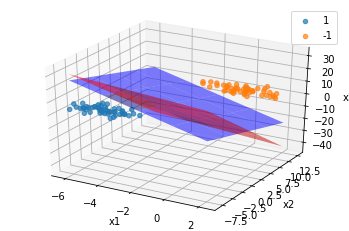

In [218]:
d,a,b,c,= w_f
x_per = np.linspace(-6, 2, 5)
y_per = np.linspace(-7.5, 12.5, 5)

X_per, Y_per = np.meshgrid(x_per, y_per)
Z_per = (d - a*X_per - b*Y_per) / c


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_f[y_f>0, 0], x_f[y_f>0, 1], x_f[y_f>0, 2], alpha=0.7, label='1')
ax.scatter3D(x_f[y_f<1, 0], x_f[y_f<1, 1], x_f[y_f<1, 2], alpha=0.7, label='-1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
#ax.set_zlim(-20, 20)
ax.plot_surface(X1,X2,X3, color='blue', alpha=0.5)
ax.plot_surface(X_per, Y_per, Z_per, color='red', alpha=0.5)
plt.legend()
plt.show()

In [214]:
np.sum(perceptron(w_f, np.c_[np.ones(n_1), x_f[y_f>0, :]]))/n_1 # just a quick sanity check

1.0

Problem 1.7 mu = error probability, nu = k/N i.e. training error 
<br>
a) for N = 10 and mu = 0.05 and mu = 0.08 the probably of at least one coin having zero loss for 1 coin and 1000 coins

In [29]:
import functools
def factorial(N):
    if N == 0:
        val = 1
    else:
        val = functools.reduce(lambda x,y: x*y, np.arange(1,N+1))
    return(val)

def binomial(k, N, p):
    prob = factorial(N)/(factorial(k)*factorial(N-k)) * p**k * (1-p)**(N-k)
    return(prob)

In [30]:
mu1 = 0.05
mu2 = 0.8

# for 1 coin and sample 10, p zero error
print('1 coin, mu=0.05: ',(1-mu1)**10)
print('1 coin, mu=0.8: ',(1-mu2)**10)
# 1000 coins, probability that at least 1 coin has zero k/N
print('1000 coins, mu=0.05: ', 1-(1-(1-mu1)**10)**1000) # utilizing binomial with p = probability from 1 coin
print('1000 coins, mu=0.8: ', 1-(1-(1-mu2)**10)**1000)

1 coin, mu=0.05:  0.5987369392383787
1 coin, mu=0.8:  1.0239999999999978e-07
1000 coins, mu=0.05:  1.0
1000 coins, mu=0.8:  0.00010239476257623004


b) N = 6, mu = 0.5 (using only 1 coin instead of 2 coins) we plot the actual $P(|\nu_i-\mu_i| > \epsilon)$ compared with hoeffding bound $P(|\nu_i-\mu_i| > \epsilon) \leq 2e^{-2\epsilon^2}$ (or one sided equivalent)

In [31]:
nus = np.arange(0, 7)/6
epsilons = nus # just giving them a different name to avoid headache and keeping in line with book notation
nu_probs = [binomial(i, 6, 0.5) for i in np.arange(0,7)]
cum_probs = np.array([sum(nu_probs[0:i]) for i in range(1, len(nu_probs)+1)])

def p_above(probabilities, nu, epsilon, mu):
    '''this function calculates the actual probability'''
    is_above = (np.abs(nu-mu) > epsilon)
    probability = np.sum(np.array(probabilities)[is_above])
    return(probability)

probs_above = [p_above(nu_probs, nus, i, 0.5) for i in epsilons]
hoeffdings_b = hoeffding(epsilons, 6, twosided=False)

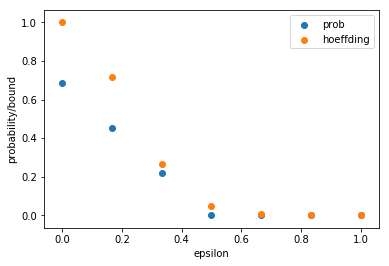

In [33]:
plt.scatter(epsilons, probs_above, label='prob')
plt.scatter(epsilons, hoeffdings_b, label='hoeffding')
plt.ylabel('probability/bound')
plt.xlabel('epsilon')
plt.legend()
plt.show()